In [74]:
import pandas as pd
import math
import numpy as np
import pandas_datareader as web
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import random
import tensorflow as tf 
from tensorflow import keras

In [3]:
df=web.DataReader("AAPL",data_source='yahoo',start='2011-01-01',end='2021-01-01')

In [4]:
df1=df.copy()

In [6]:
df1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.922909
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.138556
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.191467
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.274836
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.266529
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2518 non-null   float64
 1   Low        2518 non-null   float64
 2   Open       2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Volume     2518 non-null   float64
 5   Adj Close  2518 non-null   float64
dtypes: float64(6)
memory usage: 137.7 KB


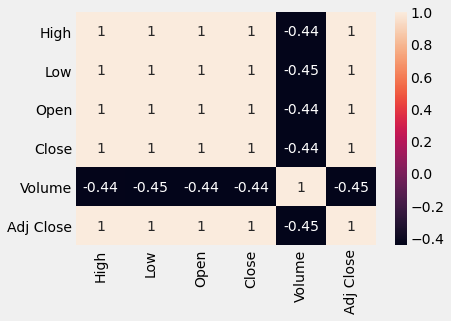

In [11]:
sns.heatmap(df.corr(),annot=True)

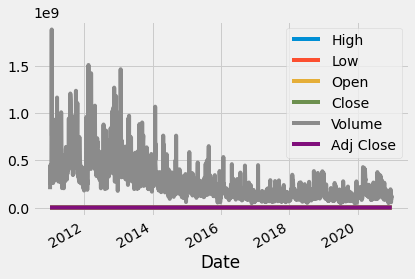

In [14]:
df.plot()

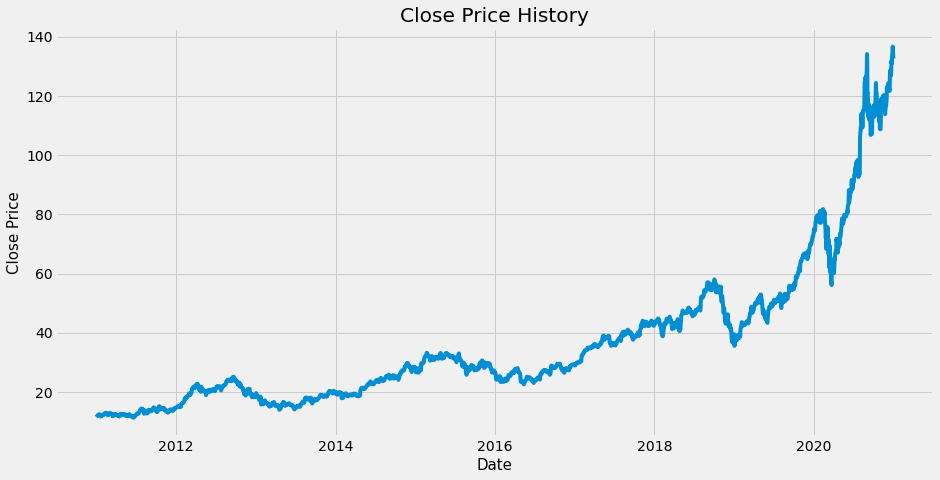

In [26]:
plt.figure(figsize=(14,7))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Close Price",fontsize=15)
plt.show()

In [27]:
data=df.filter(["Close"])
data


,Close
Date,
2010-12-31,11.520000
2011-01-03,11.770357
2011-01-04,11.831786
2011-01-05,11.928571
2011-01-06,11.918929
...,...
2020-12-24,131.970001
2020-12-28,136.690002
2020-12-29,134.869995


In [28]:
dataset=data.values
dataset

array([[ 11.52000046],
       [ 11.77035713],
       [ 11.83178616],
       ...,
       [134.86999512],
       [133.72000122],
       [132.69000244]])

In [34]:
math.ceil(14.2)

15

In [44]:
round(14.5,0)

14.0

In [45]:
round(14.6,0)

15.0

In [47]:
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2015

In [52]:
S=MinMaxScaler()
scaled_data=S.fit_transform(dataset)
print(max(scaled_data),min(scaled_data))
scaled_data

[1.] [0.]


array([[0.0020615 ],
       [0.00405751],
       [0.00454727],
       ...,
       [0.98548969],
       [0.97632118],
       [0.96810934]])

In [57]:
a=[1,2,3,4]
random.choice(a)

2

In [61]:
train_data=scaled_data[0:training_data_len]
len(train_data)

2015

In [67]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([0.0020615 , 0.00405751, 0.00454727, 0.0053189 , 0.00524203,
       0.00592255, 0.00772494, 0.00749431, 0.00828587, 0.00864464,
       0.00944191, 0.00721241, 0.00669704, 0.00494305, 0.00324601,
       0.00630126, 0.00742596, 0.00812358, 0.00794134, 0.00591685,
       0.00683371, 0.00845957, 0.0082574 , 0.00800683, 0.00887813,
       0.01041003, 0.01135535, 0.01219818, 0.01116742, 0.01182517,
       0.01248861, 0.01269362, 0.01361333, 0.01223804, 0.01003417,
       0.00663154, 0.00777335, 0.00784738, 0.0093508 , 0.01078872,
       0.00967824, 0.01047836, 0.01259681, 0.0127221 , 0.01140091,
       0.0115148 , 0.01057801, 0.00892653, 0.01044134, 0.01088838,
       0.00857346, 0.00418279, 0.00550114, 0.00437073, 0.00682801,
       0.00736901, 0.0067967 , 0.00844248, 0.01031321, 0.00999999])]
[0.010148060172599144]
[array([0.0020615 , 0.00405751, 0.00454727, 0.0053189 , 0.00524203,
       0.00592255, 0.00772494, 0.00749431, 0.00828587, 0.00864464,
       0.00944191, 0.00721241, 0.00

In [69]:
len(y_train),len(x_train),len(train_data)

(1955, 1955, 2015)

In [70]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [72]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1955, 60, 1)

In [83]:
model=keras.Sequential([
    keras.layers.LSTM(50,input_shape=(x_train.shape[1],1),return_sequences=True),
    keras.layers.LSTM(50,return_sequences=False,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1)
])
model.compile(optimizer="adam",
             loss="mean_squared_error",
             metrics=["accuracy"])


In [84]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1955/1955 [==============================] - 79s 40ms/step - loss: 3.9201e-04 - accuracy: 5.1151e-04


In [102]:
training_data_len

2015

In [104]:
test_data=scaled_data[2015-1950]
x_test=[]
y_test=dataset[training_data_len:,:]
len(y_test)
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
len(x_test),len(test_data)

(0, 1)

In [95]:
x_test=np.array(x_test)
x_test.shape


(0,)

In [108]:
unscaled_data=S.inverse_transform(scaled_data)
unscaled_data

array([[ 11.52000046],
       [ 11.77035713],
       [ 11.83178616],
       ...,
       [134.86999512],
       [133.72000122],
       [132.69000244]])